### Data Generating Process

In [1]:
from rpy2.robjects.packages import STAP
from rpy2.robjects import numpy2ri
import matplotlib.pyplot as plt
import medil.visualize as vis
import seaborn as sns
import pandas as pd
import numpy as np
from graph_est.utils import biadj_to_adj
sns.set()
numpy2ri.activate()

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
with open("learning/simulateGP.R", "r") as f:
    string = f.read()
sampleDataFromG = STAP(string, "sampleDataFromG")

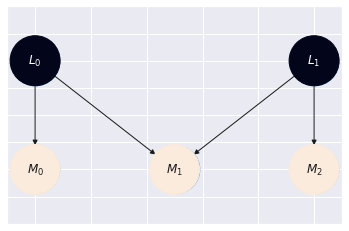

In [3]:
n = 1000
G_bi = np.array([[1, 1, 0], [0, 1, 1]], dtype="float64")
vis.show_dag(G_bi)

In [4]:
G = biadj_to_adj(G_bi)
x = sampleDataFromG.sampleDataFromG(n, G)[:, -3:]

In [5]:
from medil.independence_testing import estimate_UDG
from medil.ecc_algorithms import find_clique_min_cover
udg, _ = estimate_UDG(x, method="dcov_big")
np.fill_diagonal(udg, val=True)
biadj_mat_recon = find_clique_min_cover(udg)

solution has at most 2 cliques.

testing for solutions with 1/2 cliques

testing for solutions with 2/2 cliques


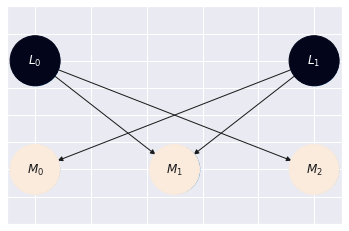

In [6]:
vis.show_dag(biadj_mat_recon)

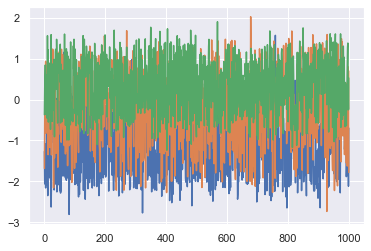

In [7]:
plt.plot(x)

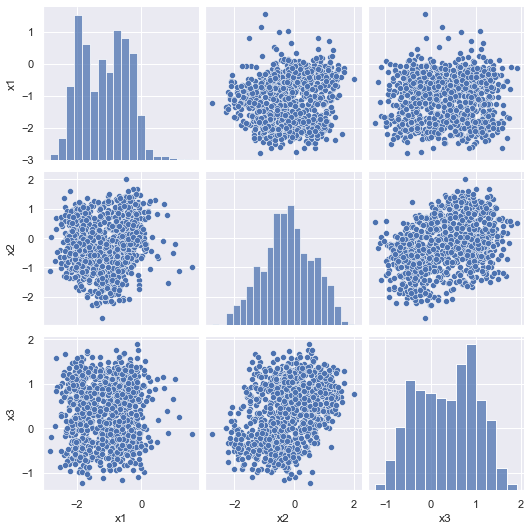

In [9]:
df_x = pd.DataFrame(x, columns=["x1", "x2", "x3"])
sns.pairplot(df_x)